# Actividad: Deep Learning

### Jose Pablo Cobos Austria        A01274631

#### 1.- Importar librerias 

In [1]:
import numpy  as np 
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf 
from tqdm import tqdm
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img

2022-11-26 02:34:00.339570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 02:34:00.791353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-26 02:34:00.791370: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 02:34:02.168191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dl

#### 2.- Carga de los datos 

In [2]:
class_names = ["Rectangulo_Liso_Largo_N°24",
"Cuadrado_Armar_Grande_N°39",
"Conector_Liso_Pequeño_N°27",
"Bloque_Liso_Mediano_N°30",
"Bloque_Liso_LargoN°24",
"Bloque_Liso_Largo_N°31",]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (150,150)

{'Rectangulo_Liso_Largo_N°24': 0, 'Cuadrado_Armar_Grande_N°39': 1, 'Conector_Liso_Pequeño_N°27': 2, 'Bloque_Liso_Mediano_N°30': 3, 'Bloque_Liso_LargoN°24': 4, 'Bloque_Liso_Largo_N°31': 5}


In [3]:
def load_data():
    DIRECTORY = r"/home/josecobos/Documentos/Escuela/IA_Parte2/Modulo_2/data/data2"
    CATEGORY = ["seg_train","seg_test"]
    output = []

    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        #print(path)
        images = []
        labels = []

        print("Loading {}".format(category))

        #print(os.listdir(path))

        for folder in os.listdir(path):
            print(folder)

            label = class_names_label[folder]

            #print(os.listdir(os.path.join(path,folder)))

            for file in os.listdir(os.path.join(path,folder)):

                img_path = os.path.join(os.path.join(path,folder),file)

                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                images.append(image)
                labels.append(label)

                #print(images)

        images = np.array(images, dtype= 'float32')
        labels = np.array(labels, dtype= 'int32')

        output.append((images,labels))
    
    return output

        

In [4]:
(train_images, train_labels), (test_images,test_labels) = load_data()

Loading seg_train
Bloque_Liso_Largo_N°31
Cuadrado_Armar_Grande_N°39
Bloque_Liso_Mediano_N°30
Bloque_Liso_LargoN°24
Rectangulo_Liso_Largo_N°24
Conector_Liso_Pequeño_N°27
Loading seg_test
Bloque_Liso_Largo_N°31
Cuadrado_Armar_Grande_N°39
Bloque_Liso_Mediano_N°30
Bloque_Liso_LargoN°24
Rectangulo_Liso_Largo_N°24
Conector_Liso_Pequeño_N°27


#### 3.- Analisis de los datos

In [5]:
train_images,train_labels = shuffle(train_images,train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 9000
Number of testing examples: 600
Each image is of size: (150, 150)


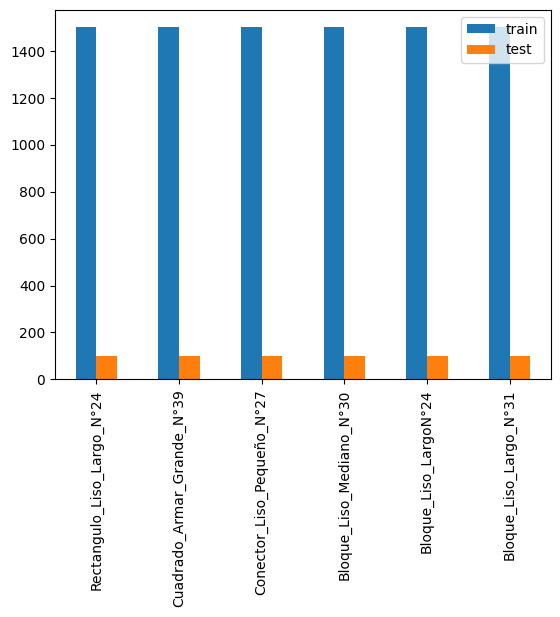

In [7]:

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()



In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

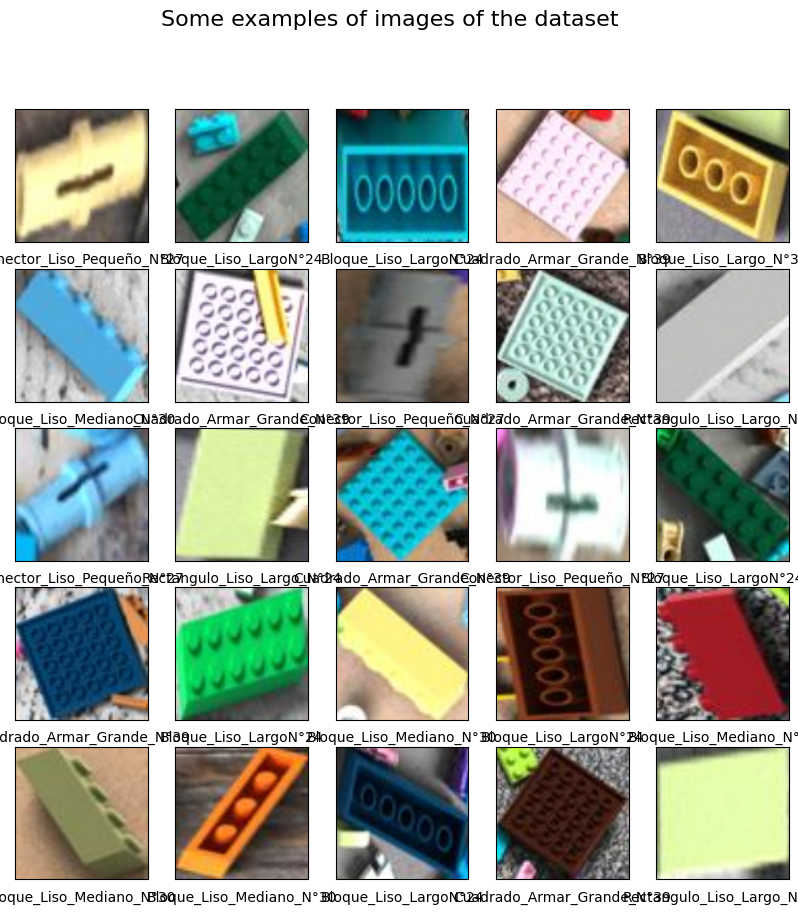

In [9]:
def display_examples(class_names, images, labels):
  fig = plt.figure(figsize=(10,10))
  fig.suptitle("Some examples of images of the dataset", fontsize=16)
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
  plt.show()

display_examples(class_names,train_images,train_labels)


In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


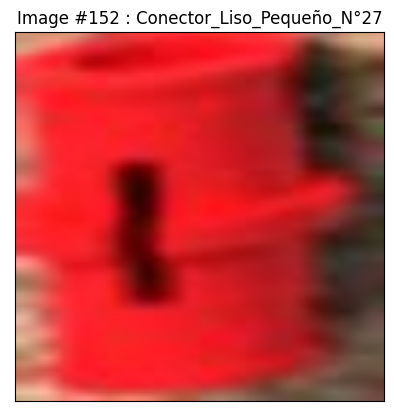

In [11]:
display_random_image(class_names, train_images, train_labels)

#### 5.- Generacion de modelo

##### Modelo 1

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)

])

2022-11-26 00:32:44.357268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 00:32:44.357888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-26 00:32:44.357948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-26 00:32:44.357987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could 

In [10]:
model1.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model1.fit(train_images,train_labels,batch_size=256,epochs=10,validation_split= .2)

Epoch 1/10


2022-11-26 00:32:44.713064: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1944000000 exceeds 10% of free system memory.
2022-11-26 00:32:45.887631: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.
2022-11-26 00:32:46.426200: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.


 1/29 [>.............................] - ETA: 1:00 - loss: 77.7007 - accuracy: 0.2188

2022-11-26 00:32:47.317969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.
2022-11-26 00:32:47.855359: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.


29/29 [==============================] - 43s 1s/step - loss: 3374.4370 - accuracy: 0.1707 - val_loss: 95.1131 - val_accuracy: 0.1656
Epoch 2/10
29/29 [==============================] - 41s 1s/step - loss: 35.8055 - accuracy: 0.2242 - val_loss: 8.1733 - val_accuracy: 0.2744
Epoch 3/10
29/29 [==============================] - 42s 1s/step - loss: 5.3250 - accuracy: 0.3335 - val_loss: 2.9800 - val_accuracy: 0.3506
Epoch 4/10
29/29 [==============================] - 43s 1s/step - loss: 2.1904 - accuracy: 0.4329 - val_loss: 2.3177 - val_accuracy: 0.3644
Epoch 5/10
29/29 [==============================] - 44s 2s/step - loss: 1.5221 - accuracy: 0.5158 - val_loss: 2.0857 - val_accuracy: 0.3850
Epoch 6/10
29/29 [==============================] - 44s 2s/step - loss: 1.0726 - accuracy: 0.6196 - val_loss: 1.9813 - val_accuracy: 0.4111
Epoch 7/10
29/29 [==============================] - 44s 2s/step - loss: 0.8067 - accuracy: 0.7069 - val_loss: 2.0069 - val_accuracy: 0.4389
Epoch 8/10
29/29 [========

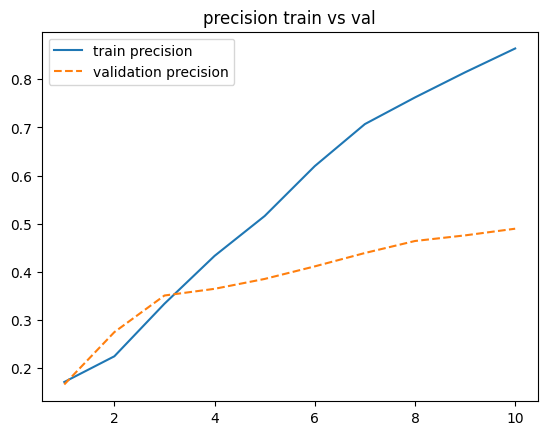

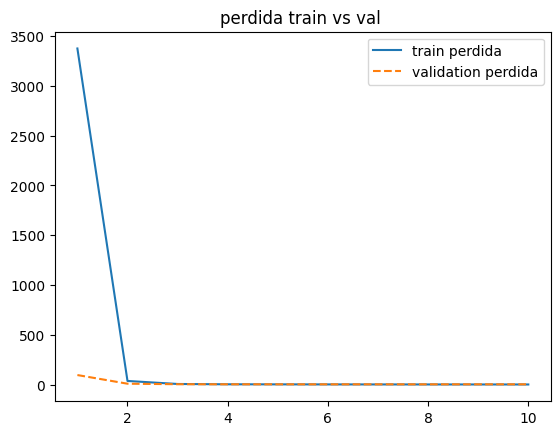

In [12]:
precision = history.history['accuracy']
perdida = history.history['loss']

val_precision = history.history['val_accuracy']
val_perdida = history.history['val_loss']

epocas = range(1, len(precision)+1)

plt.plot(epocas,precision,'-',label='train precision')
plt.plot(epocas,val_precision, '--', label='validation precision')
plt.title('precision train vs val')
plt.legend()

plt.figure()

plt.plot(epocas,perdida, '-', label ='train perdida')
plt.plot(epocas,val_perdida, '--', label = 'validation perdida')
plt.title('perdida train vs val ')
plt.legend()

plt.show()

##### Modelo 2

In [44]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)

])

In [46]:
model2.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model2.fit(train_images,train_labels,batch_size=128,epochs=10,validation_split= .2)

Epoch 1/10
57/57 [==============================] - 66s 1s/step - loss: 125.3542 - accuracy: 0.2572 - val_loss: 1.6397 - val_accuracy: 0.3522
Epoch 2/10
57/57 [==============================] - 64s 1s/step - loss: 1.3805 - accuracy: 0.4729 - val_loss: 1.5271 - val_accuracy: 0.4189
Epoch 3/10
57/57 [==============================] - 62s 1s/step - loss: 0.9841 - accuracy: 0.6367 - val_loss: 1.5096 - val_accuracy: 0.5006
Epoch 4/10
57/57 [==============================] - 62s 1s/step - loss: 0.6780 - accuracy: 0.7646 - val_loss: 1.7304 - val_accuracy: 0.5139
Epoch 5/10
57/57 [==============================] - 70s 1s/step - loss: 0.4209 - accuracy: 0.8611 - val_loss: 1.8122 - val_accuracy: 0.5456
Epoch 6/10
57/57 [==============================] - 71s 1s/step - loss: 0.2817 - accuracy: 0.9140 - val_loss: 2.1873 - val_accuracy: 0.5233
Epoch 7/10
57/57 [==============================] - 86s 2s/step - loss: 0.2263 - accuracy: 0.9367 - val_loss: 2.1771 - val_accuracy: 0.5650
Epoch 8/10
57/57 [

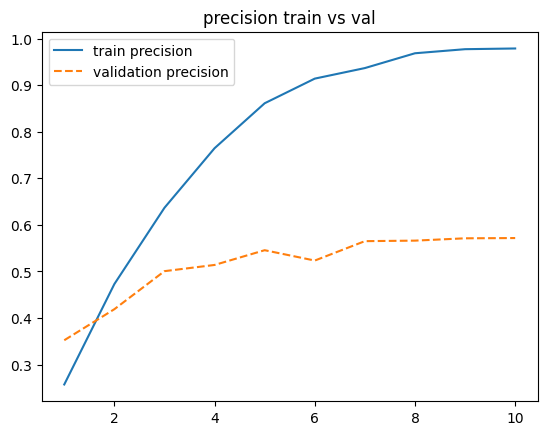

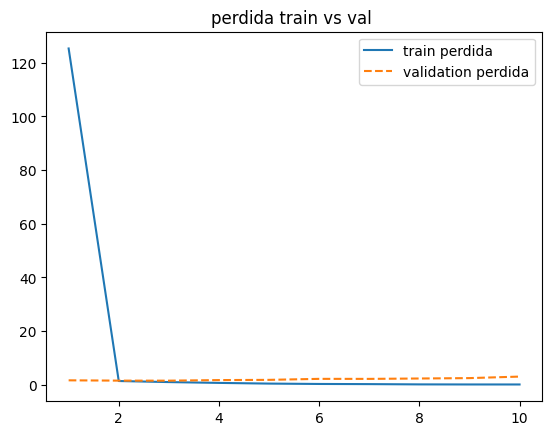

In [16]:
precision = history.history['accuracy']
perdida = history.history['loss']

val_precision = history.history['val_accuracy']
val_perdida = history.history['val_loss']

epocas = range(1, len(precision)+1)

plt.plot(epocas,precision,'-',label='train precision')
plt.plot(epocas,val_precision, '--', label='validation precision')
plt.title('precision train vs val')
plt.legend()

plt.figure()

plt.plot(epocas,perdida, '-', label ='train perdida')
plt.plot(epocas,val_perdida, '--', label = 'validation perdida')
plt.title('perdida train vs val ')
plt.legend()

plt.show()

##### Modelo 3

In [14]:
history = model2.fit(train_images,train_labels,batch_size=64,epochs=40,validation_split= .2)

Epoch 1/40


2022-11-26 01:01:00.883659: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1944000000 exceeds 10% of free system memory.


113/113 [==============================] - 63s 553ms/step - loss: 66.0288 - accuracy: 0.2857 - val_loss: 1.5356 - val_accuracy: 0.4000
Epoch 2/40
113/113 [==============================] - 62s 553ms/step - loss: 1.2969 - accuracy: 0.5181 - val_loss: 1.3575 - val_accuracy: 0.4944
Epoch 3/40
113/113 [==============================] - 62s 548ms/step - loss: 0.9361 - accuracy: 0.6617 - val_loss: 1.4016 - val_accuracy: 0.5106
Epoch 4/40
113/113 [==============================] - 62s 550ms/step - loss: 0.6592 - accuracy: 0.7728 - val_loss: 1.4851 - val_accuracy: 0.5222
Epoch 5/40
113/113 [==============================] - 62s 552ms/step - loss: 0.4196 - accuracy: 0.8619 - val_loss: 1.6990 - val_accuracy: 0.5772
Epoch 6/40
113/113 [==============================] - 66s 581ms/step - loss: 0.2600 - accuracy: 0.9149 - val_loss: 2.1153 - val_accuracy: 0.5644
Epoch 7/40
113/113 [==============================] - 66s 581ms/step - loss: 0.1982 - accuracy: 0.9413 - val_loss: 2.0459 - val_accuracy: 0.

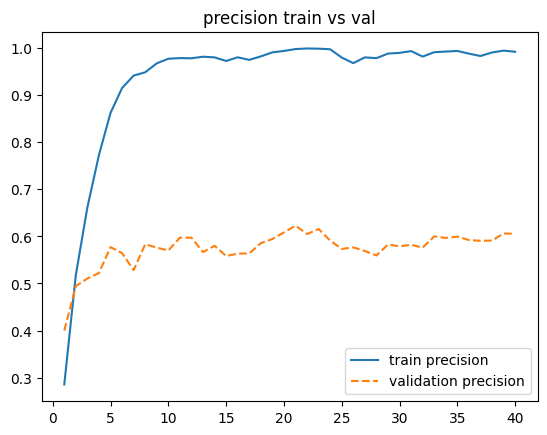

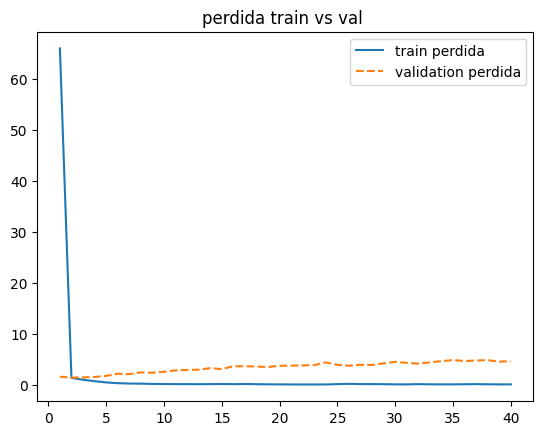

In [15]:
precision = history.history['accuracy']
perdida = history.history['loss']

val_precision = history.history['val_accuracy']
val_perdida = history.history['val_loss']

epocas = range(1, len(precision)+1)

plt.plot(epocas,precision,'-',label='train precision')
plt.plot(epocas,val_precision, '--', label='validation precision')
plt.title('precision train vs val')
plt.legend()

plt.figure()

plt.plot(epocas,perdida, '-', label ='train perdida')
plt.plot(epocas,val_perdida, '--', label = 'validation perdida')
plt.title('perdida train vs val ')
plt.legend()

plt.show()

##### Modelo 4

In [12]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

2022-11-26 02:34:27.457594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 02:34:27.458253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-26 02:34:27.458490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-26 02:34:27.458679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could 

In [13]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

2022-11-26 02:34:29.965105: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2430000000 exceeds 10% of free system memory.


19/19 [==============================] - 20s 1s/step


In [15]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [16]:

model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model4.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)



Epoch 1/15
57/57 [==============================] - 1s 8ms/step - loss: 0.8577 - accuracy: 0.6969 - val_loss: 0.5438 - val_accuracy: 0.8183
Epoch 2/15
57/57 [==============================] - 0s 6ms/step - loss: 0.4370 - accuracy: 0.8579 - val_loss: 0.4356 - val_accuracy: 0.8600
Epoch 3/15
57/57 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8865 - val_loss: 0.4088 - val_accuracy: 0.8633
Epoch 4/15
57/57 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9090 - val_loss: 0.3811 - val_accuracy: 0.8672
Epoch 5/15
57/57 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.9322 - val_loss: 0.3562 - val_accuracy: 0.8828
Epoch 6/15
57/57 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.9447 - val_loss: 0.3462 - val_accuracy: 0.8883
Epoch 7/15
57/57 [==============================] - 0s 6ms/step - loss: 0.1609 - accuracy: 0.9567 - val_loss: 0.3327 - val_accuracy: 0.8861
Epoch 8/15
57/57 [==

In [23]:
test_loss = model4.evaluate(test_features, test_labels)

19/19 [==============================] - 0s 1ms/step - loss: 1.1247 - accuracy: 0.8100


In [22]:
model4.save("model4.h5") 